In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=e96057dc33e65f1331e33d75f90779f012e2c35203ae3df9996988bd95c41bba
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from scipy.stats import chi2_contingency
#from apyori import apriori

In [2]:
dataForAnalysis = pd.read_csv("/content/drive/MyDrive/FA21 CMPE 255 Term Project/predictedQualityWithSite.csv",encoding="utf8")

In [3]:
dataForAnalysis = dataForAnalysis.drop(columns=['Unnamed: 0','State Code','County Code','Site Num'])

In [4]:
dataForAnalysis


,year,month,day,AQI,Quality,STNAME,CTYNAME,Population,Site Number,Land Use,Location Setting
0,2018,1,2,32.350743,Good,Alabama,Baldwin County,218071,10,COMMERCIAL,SUBURBAN
1,2018,1,5,34.262689,Good,Alabama,Baldwin County,218071,10,COMMERCIAL,SUBURBAN
2,2018,1,8,16.198026,Good,Alabama,Baldwin County,218071,10,COMMERCIAL,SUBURBAN
3,2018,1,11,19.920814,Good,Alabama,Baldwin County,218071,10,COMMERCIAL,SUBURBAN
4,2018,1,14,25.563788,Good,Alabama,Baldwin County,218071,10,COMMERCIAL,SUBURBAN
...,...,...,...,...,...,...,...,...,...,...,...
823377,2020,12,27,33.022643,Good,Wyoming,Weston County,6743,3,FOREST,RURAL
823378,2020,12,28,31.527897,Good,Wyoming,Weston County,6743,3,FOREST,RURAL
823379,2020,12,29,34.098091,Good,Wyoming,Weston County,6743,3,FOREST,RURAL
823380,2020,12,30,34.098091,Good,Wyoming,Weston County,6743,3,FOREST,RURAL


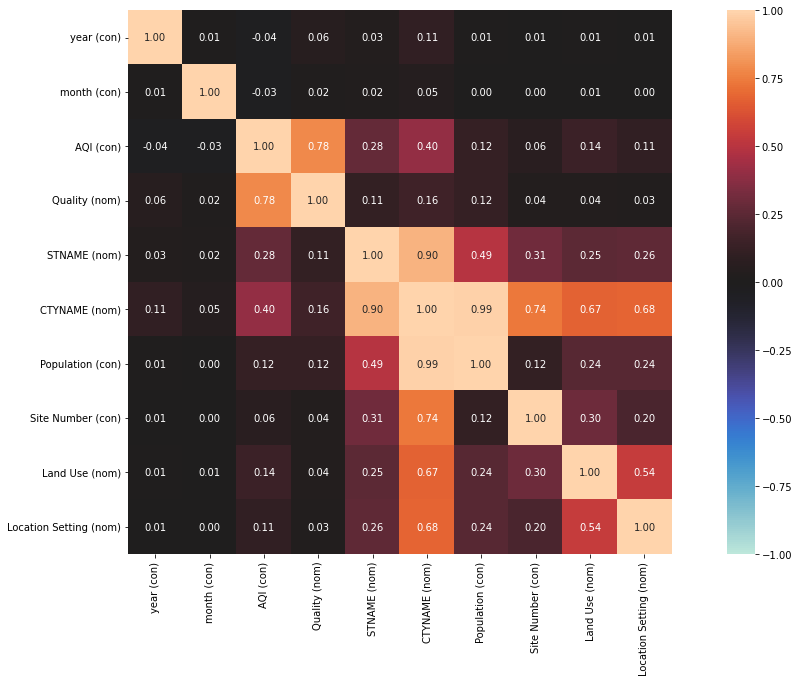

In [ ]:

from dython import nominal
nominal.associations(dataForAnalysis,figsize=(20,10),mark_columns=True);

In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','Location Setting','Quality']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Quality,year,Location Setting,Good,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,2018,RURAL,97877,16970,122,1344,0
1,2018,SUBURBAN,99845,17960,133,1612,2
2,2018,URBAN AND CENTER CITY,63939,9179,50,662,0
3,2019,RURAL,96263,12291,30,494,0
4,2019,SUBURBAN,99978,15109,81,875,1
5,2019,URBAN AND CENTER CITY,63659,7540,17,271,0
6,2020,RURAL,96381,9382,75,858,1
7,2020,SUBURBAN,98660,12463,248,1550,8
8,2020,URBAN AND CENTER CITY,60404,6273,74,593,7


**Association analysis between air quality and location setting**

H0: The features Quality and Location Setting  are NOT dependent (which means they are not associated).

H1: The features Quality and Location Setting  are  dependent (which means they are  associated).

In [ ]:
location_data_crosstab = pd.crosstab(dataForAnalysis['Quality'], 
                             dataForAnalysis['Location Setting'],  
                               margins = False) 
print(location_data_crosstab) 

Location Setting                RURAL  SUBURBAN  URBAN AND CENTER CITY
Quality                                                               
Good                           290521    298483                 188002
Moderate                        38643     45532                  22992
Unhealthy                         227       462                    141
Unhealthy for Sensitive Group    2696      4037                   1526
Very Unhealthy                      1        11                      7


In [ ]:
chi, pval, dof, exp = chi2_contingency(location_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  1202.1473722542469
The p-Value is  3.2947023477836536e-254
The degree of fredom is  8
[[2.88861364e+05 3.03158823e+05 1.84985813e+05]
 [3.98406265e+04 4.18125749e+04 2.55137986e+04]
 [3.08562524e+02 3.23835109e+02 1.97602367e+02]
 [3.07038299e+03 3.22235442e+03 1.96626259e+03]
 [7.06347947e+00 7.41309286e+00 4.52342768e+00]]


In [ ]:
significance = 0.05

print(pval)
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

3.2947023477836536e-254
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


**Association analysis between air quality and population**


In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','STNAME','CTYNAME','Population','Quality']).size().unstack(fill_value=0)
all_merged_df.reset_index()

Quality,year,STNAME,CTYNAME,Population,Good,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
0,2018,Alabama,Baldwin County,218071,173,21,0,0,0
1,2018,Alabama,Colbert County,54970,178,20,0,0,0
2,2018,Alabama,DeKalb County,71430,279,25,0,0,0
3,2018,Alabama,Elmore County,81189,134,10,0,0,0
4,2018,Alabama,Etowah County,102766,232,25,0,0,0
...,...,...,...,...,...,...,...,...,...
2617,2020,Wyoming,Sublette County,9856,910,119,0,7,0
2618,2020,Wyoming,Sweetwater County,42673,764,68,0,2,0
2619,2020,Wyoming,Teton County,23497,466,29,0,3,0
2620,2020,Wyoming,Uinta County,20215,92,22,0,2,0


In [ ]:
dataForAnalysis['AQI'].corr(dataForAnalysis['Population'])

0.12245377059887536

This is a positive corelation between Air Quality Index and Polpulation. However , The strength is small.

**Association analysis between air quality and land use** 

H0: The features Quality and Land Use are NOT dependent (which means they are not associated).

H1: The features Quality and Land Use are  dependent (which means they are  associated).

In [ ]:
all_merged_df = dataForAnalysis.groupby(['year','Quality','Land Use']).size().unstack(fill_value=0)
all_merged_df = all_merged_df .reset_index()
all_merged_df

Land Use,year,Quality,AGRICULTURAL,BLIGHTED AREAS,COMMERCIAL,DESERT,FOREST,INDUSTRIAL,MILITARY RESERVATION,MOBILE,RESIDENTIAL
0,2018,Good,40934,777,63125,5221,24218,22154,913,6497,97822
1,2018,Moderate,6280,77,9791,2032,4256,3553,118,706,17296
2,2018,Unhealthy,16,0,77,7,35,15,0,12,143
3,2018,Unhealthy for Sensitive Group,394,1,904,192,293,228,8,94,1504
4,2018,Very Unhealthy,0,0,1,0,0,0,0,0,1
5,2019,Good,40678,695,61949,5460,23238,22048,878,6629,98325
6,2019,Moderate,4797,26,8097,1632,2146,3030,112,650,14450
7,2019,Unhealthy,1,0,42,6,0,11,0,0,68
8,2019,Unhealthy for Sensitive Group,123,0,455,83,66,110,9,34,760
9,2019,Very Unhealthy,0,0,0,0,0,0,0,0,1


In [ ]:
landuse_data_crosstab = pd.crosstab(dataForAnalysis['Quality'], 
                             dataForAnalysis['Land Use'],  
                               margins = False) 
print(landuse_data_crosstab) 

Land Use                       AGRICULTURAL  ...  RESIDENTIAL
Quality                                      ...             
Good                                 122506  ...       292242
Moderate                              14532  ...        43503
Unhealthy                                69  ...          401
Unhealthy for Sensitive Group           839  ...         3600
Very Unhealthy                            0  ...           15

[5 rows x 9 columns]


In [ ]:
chi, pval, dof, exp = chi2_contingency(location_data_crosstab)
print('\033[1m' +"The Chi-Square Statistic Value is ",chi)
print('\033[1m' +"The p-Value is ",pval)
print('\033[1m' +"The degree of fredom is ",dof)
print(exp)

The Chi-Square Statistic Value is  1202.1473722542469
The p-Value is  3.2947023477836536e-254
The degree of fredom is  8
[[2.88861364e+05 3.03158823e+05 1.84985813e+05]
 [3.98406265e+04 4.18125749e+04 2.55137986e+04]
 [3.08562524e+02 3.23835109e+02 1.97602367e+02]
 [3.07038299e+03 3.22235442e+03 1.96626259e+03]
 [7.06347947e+00 7.41309286e+00 4.52342768e+00]]


In [ ]:
significance = 0.05

print(pval)
print('\033[1m' +'p-value=%.6f, significance=%.2f\n' % (pval, significance))
if pval < significance:
    print('\033[1m' +"""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print('\033[1m' +"""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

3.2947023477836536e-254
p-value=0.000000, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.
